In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
#Read the data
df=pd.read_csv('data/news.csv', index_col= 0)

#Get shape and head
print(df.shape)
df.head()

(6335, 3)


,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
labels=df.label
labels.head()

8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [6]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [10]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {score*100:.2f}%')

Accuracy: 93.05%


In [13]:
# Build confusion matrix
matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

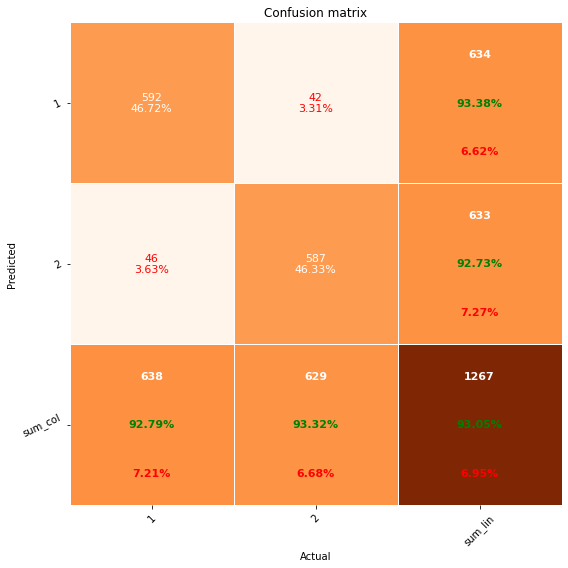

In [16]:
#pip install pretty-confusion-matrix

from pretty_confusion_matrix import pp_matrix
df_cm = pd.DataFrame(matrix, index=range(1, 3), columns=range(1, 3))
pp_matrix(df_cm)